In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as statistics

In [2]:
insurance_data = pd.read_csv("insurance.txt", delimiter=',')

In [3]:
insurance_data

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [4]:
norm_insu_data = ((insurance_data-insurance_data.mean())/(insurance_data.std()))
norm_insu_data.insert(0, 'x0', 1) #x0 is appeneded to allow for the zeroth order term

In [5]:
#normalised data frame

norm_insu_data

,x0,age,bmi,children,charges
0,1,-1.438227,-0.453151,-0.908274,0.298472
1,1,-1.509401,0.509431,-0.078738,-0.953333
2,1,-0.797655,0.383164,1.580335,-0.728402
3,1,-0.441782,-1.305043,-0.908274,0.719574
4,1,-0.512957,-0.292447,-0.908274,-0.776512
...,...,...,...,...,...
1333,1,0.768185,0.050278,1.580335,-0.220468
1334,1,-1.509401,0.206062,-0.908274,-0.913661
1335,1,-1.509401,1.014499,-0.908274,-0.961237
1336,1,-1.295877,-0.797515,-0.908274,-0.930014


In [6]:
#creating a list of 20 data_frames that have been shuffled

dataset_list=list()
dataset_list.append(norm_insu_data.sample(frac=1))
for i in range(1,20):
    dataset_list.append(dataset_list[-1].sample(frac=1))


In [7]:
# Splitting the datasets into testing and training

training_data_list = [None]*20
testing_data_list = [None]*20

for i in range(20):
    training_data_list[i] = dataset_list[i].sample(frac=0.7)
    testing_data_list[i] = dataset_list[i].drop(training_data_list[i].index)

In [8]:
# Normal equation method to find regression model

indep_attrs = ["x0", "age", "bmi", "children"]
dep_attr = ["charges"]

testing_err_norm = []
training_err_norm = []
final_theta_ne=[]
for i in range(20):
    
    #Calculating the weights
    X_train = training_data_list[i][indep_attrs].to_numpy() 
    Y_train = training_data_list[i][dep_attr].to_numpy()
    XT_train = X_train.transpose()

    X_test = testing_data_list[i][indep_attrs].to_numpy() 
    Y_test = testing_data_list[i][dep_attr].to_numpy()
    theta = np.matmul(np.linalg.inv(np.matmul(XT_train,X_train)),np.matmul(XT_train,Y_train))
    final_theta_ne.append(theta)
    
    #Calculating RMSE for training data
    diff_train = np.subtract(np.matmul(X_train, theta), Y_train)
    diffT_train = diff_train.transpose()
    sumsq_train = np.matmul(diffT_train, diff_train)[0][0]
    rmse_train = np.sqrt(sumsq_train/(Y_train.shape[0]))
    training_err_norm.append(rmse_train)
    
    #Calculating RMSE for testing data

    diff_test = np.subtract(np.matmul(X_test, theta), Y_test)
    diffT_test = diff_test.transpose()
    sumsq_test = np.matmul(diffT_test, diff_test)[0][0]
    rmse_test = np.sqrt(sumsq_test/(Y_test.shape[0]))
    testing_err_norm.append(rmse_test)

In [9]:
#final theta after applying NE
bias_ne=[]
bias_ne.append("Bias")
age_ne=[]
age_ne.append("Age")
bmi_ne=[]
bmi_ne.append("BMI")
children_ne=[]
children_ne.append("Children")
print("FINAL THETA OF 20 MODELS AFTER APPLYING NE:-")    
for x in range(20): 
            bias_ne.append(final_theta_ne[x][0]) 
            age_ne.append(final_theta_ne[x][1])
            bmi_ne.append(final_theta_ne[x][2]) 
            children_ne.append(final_theta_ne[x][3])
            
    
for c1, c2, c3, c4 in zip(bias_ne, age_ne, bmi_ne, children_ne):
        print ("%-20s %-20s %-20s %s" % (c1, c2, c3, c4))    

FINAL THETA OF 20 MODELS AFTER APPLYING NE:-
Bias                 Age                  BMI                  Children
[-0.00378179]        [0.27101434]         [0.16553051]         [0.02627842]
[-0.00250445]        [0.27276626]         [0.17079652]         [0.04933098]
[0.0025264]          [0.27045197]         [0.15493896]         [0.05294889]
[0.0170426]          [0.24456034]         [0.18962777]         [0.04381018]
[0.00100866]         [0.2851043]          [0.15979823]         [0.01605671]
[0.0049101]          [0.25977872]         [0.17382247]         [0.04829716]
[-0.00084398]        [0.32355063]         [0.17384328]         [0.03466548]
[0.00811099]         [0.2811507]          [0.16429255]         [0.03324912]
[-0.00885564]        [0.28398629]         [0.16064195]         [0.06372061]
[0.01939818]         [0.26399493]         [0.17194407]         [0.06177575]
[0.01060774]         [0.294885]           [0.13899275]         [0.05015955]
[-0.00192902]        [0.27325886]         [0.17

In [10]:
#GRADIENT DESCENT FUNCTION DEFINITION
def gradient_descent(x, y, iterations, eta, x_test, y_test, precis):
    
    theta = np.random.rand(x.shape[1],1)
    m = y.shape[0]
    n = y_test.shape[0]
    past_costs_train = []
    past_costs_test= []
    past_rmse_train= []
    past_rmse_test= []
    for i in range(iterations):
        
        prediction_train = np.dot(x, theta)
        error_train = prediction_train - y
        cost_train = 1/(2*m) * np.dot(error_train.T, error_train)
        past_costs_train.append(cost_train[0][0])
        rmse_train = np.sqrt((2*(cost_train[0][0])))
        past_rmse_train.append(rmse_train)
        theta = theta - (eta * (1/m) * np.dot(x.T, error_train))
        
        prediction_test = np.dot(x_test, theta)
        error_test = prediction_test - y_test
        cost_test = 1/(2*n) * np.dot(error_test.T, error_test)
        past_costs_test.append(cost_test[0][0])
        rmse_test = np.sqrt((2*cost_test[0][0]))
        past_rmse_test.append(rmse_test)
        
        if((len(past_costs_train) > 1) and abs(past_costs_train[-2]-past_costs_train[-1]) <= precis):
            break
            
    return theta, past_costs_train, past_costs_test, past_rmse_train, past_rmse_test


In [11]:
# GRADIENT DESCENT IMPLEMENTATION ON 20 MODELS
past_rmse_train_grad_desc = [None]*20
past_rmse_test_grad_desc = [None]*20
past_costs_train_gd = [None]*20
past_costs_test_gd = [None]*20
final_theta_gd = [None]*20
precision = 0.000001
eta = 0.001
iterations = 5000
for i in range(20):
    
    X_train = training_data_list[i][indep_attrs].to_numpy() 
    Y_train = training_data_list[i][dep_attr].to_numpy()
    
    X_test = testing_data_list[i][indep_attrs].to_numpy() 
    Y_test = testing_data_list[i][dep_attr].to_numpy()
    
    final_theta_gd[i], past_costs_train_gd[i], past_costs_test_gd[i], past_rmse_train_grad_desc[i], past_rmse_test_grad_desc[i] = gradient_descent(X_train, Y_train, iterations, eta, X_test, Y_test, precision)
    
    #printing error values for learning rate=0.01 , 20 models.
    training_gd=[]
    training_gd.append("Training")
    testing_gd=[]
    testing_gd.append("Testing")
    
    print ("Error values (every 500th iteration) for model number",i+1,":-\n")
    for x in range(len(past_rmse_train_grad_desc[i])): 
        if x%500==0:
            training_gd.append(past_rmse_train_grad_desc[i][x]) 
            testing_gd.append(past_rmse_test_grad_desc[i][x])
    
    for c1, c2 in zip(training_gd, testing_gd):
        print ("%-40s %s" % (c1, c2))         
    print("\n")

Error values (every 500th iteration) for model number 1 :-

Training                                 Testing
1.3218588143798216                       1.2154496616967634
1.0945132078632593                       1.021858829336602
1.0032947309199367                       0.9479329436040856
0.9691484597361989                       0.9221588192756416
0.9567102891009639                       0.9137642674402111
0.9522008440341178                       0.9112574650825931
0.9505585884110368                       0.9106358710391246


Error values (every 500th iteration) for model number 2 :-

Training                                 Testing
1.22422694011007                         1.2636306190873172
1.0420507534150452                       1.071896330970908
0.9710351370136766                       0.9969622751193572
0.9450237963666668                       0.9695396274214355
0.9357151523649795                       0.9597651534607904
0.9323955145362348                       0.9563002953274243
0.

Error values (every 500th iteration) for model number 17 :-

Training                                 Testing
1.4545033945477497                       1.478858572955771
1.1536988756847177                       1.1721197858418932
1.0245370656130415                       1.0320816030273947
0.9739539820235031                       0.9716919986428346
0.9550852099710764                       0.9458642141123396
0.9481838327796465                       0.934494093150102
0.945674882309701                        0.9292372973357296


Error values (every 500th iteration) for model number 18 :-

Training                                 Testing
1.002892950019209                        1.0100782004231987
0.9722333670184887                       0.9626786013291928
0.9590934734340093                       0.9393539569031171
0.9535216946371889                       0.9275956976708537
0.9511681114211715                       0.9214466914314188
0.9501748264887216                       0.9180957528137628


In [12]:
#final theta after applying GD
bias_gd=[]
bias_gd.append("Bias")
age_gd=[]
age_gd.append("Age")
bmi_gd=[]
bmi_gd.append("BMI")
children_gd=[]
children_gd.append("Children")
print("FINAL THETA OF 20 MODELS AFTER APPLYING GD:-")    
for x in range(20): 
            bias_gd.append(final_theta_gd[x][0]) 
            age_gd.append(final_theta_gd[x][1])
            bmi_gd.append(final_theta_gd[x][2]) 
            children_gd.append(final_theta_gd[x][3])
            
    
for c1, c2, c3, c4 in zip(bias_gd, age_gd, bmi_gd, children_gd):
        print ("%-20s %-20s %-20s %s" % (c1, c2, c3, c4))         


FINAL THETA OF 20 MODELS AFTER APPLYING GD:-
Bias                 Age                  BMI                  Children
[0.01867989]         [0.25985614]         [0.18468934]         [0.03198843]
[0.01212936]         [0.27849576]         [0.19815831]         [0.05105012]
[0.01382705]         [0.26612526]         [0.16901748]         [0.07962184]
[0.03742253]         [0.24286204]         [0.20518562]         [0.06053146]
[0.01724613]         [0.30815115]         [0.14371009]         [0.02395525]
[0.00831315]         [0.27437798]         [0.18615446]         [0.07055158]
[0.0124687]          [0.33604324]         [0.1809259]          [0.0563497]
[0.03969744]         [0.28112217]         [0.16862997]         [0.03267953]
[0.00071509]         [0.26886881]         [0.18370642]         [0.08549639]
[0.03829877]         [0.27902164]         [0.16457079]         [0.07958267]
[0.01973252]         [0.286982]           [0.15694637]         [0.07328642]
[0.01555164]         [0.28378425]         [0.190

Model number  1 :


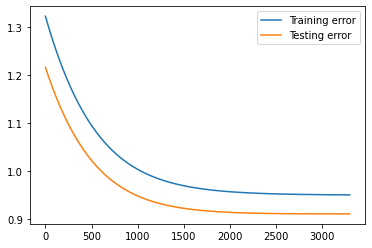

Model number  2 :


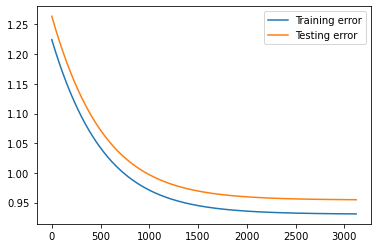

Model number  3 :


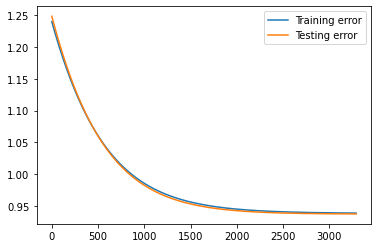

Model number  4 :


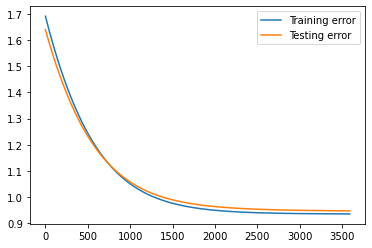

Model number  5 :


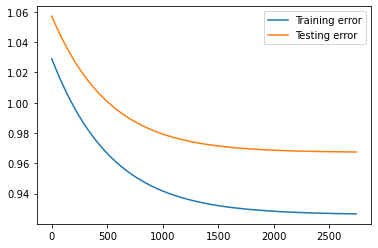

Model number  6 :


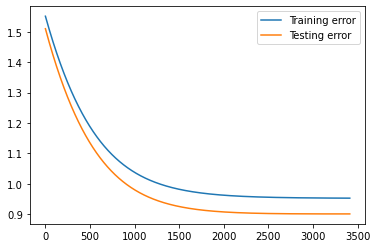

Model number  7 :


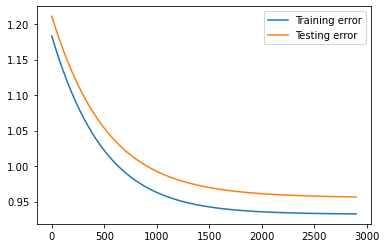

Model number  8 :


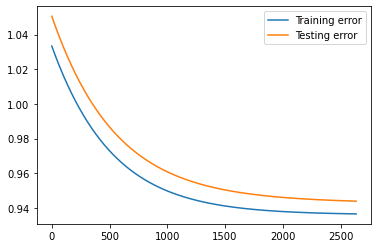

Model number  9 :


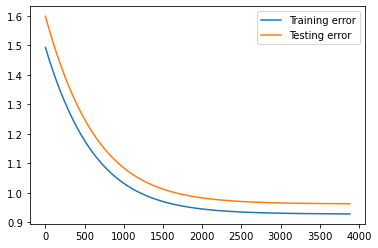

Model number  10 :


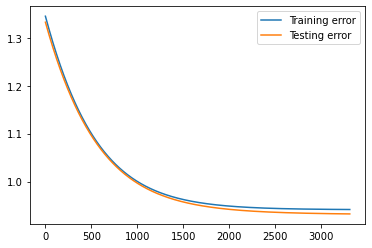

Model number  11 :


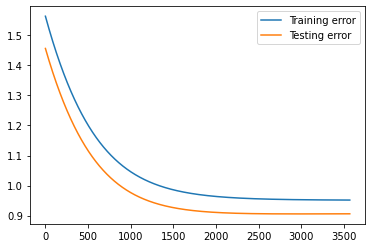

Model number  12 :


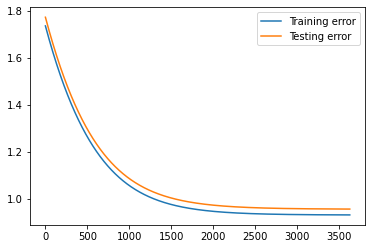

Model number  13 :


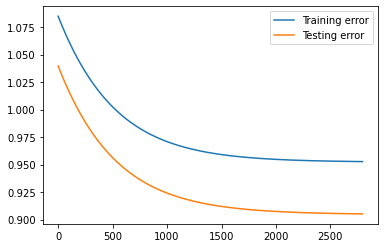

Model number  14 :


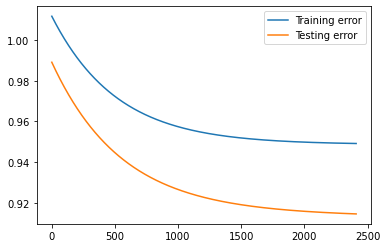

Model number  15 :


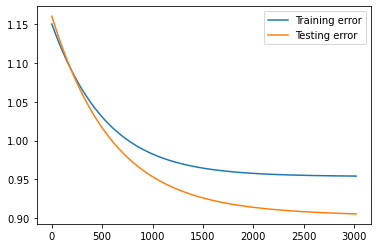

Model number  16 :


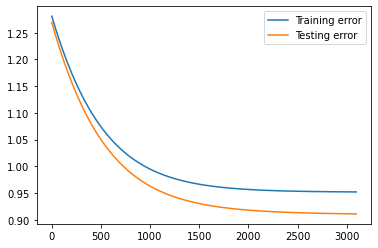

Model number  17 :


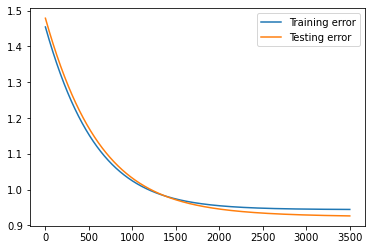

Model number  18 :


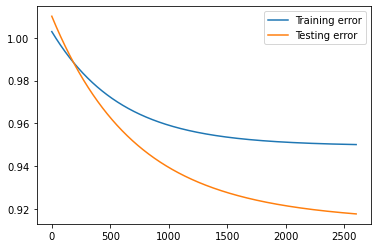

Model number  19 :


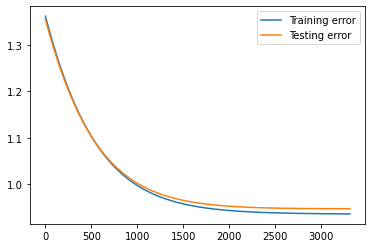

Model number  20 :


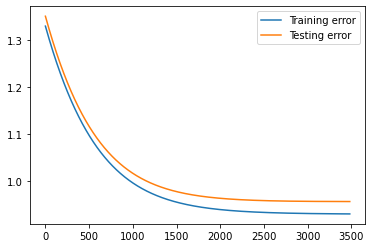

In [13]:
# Plotting training VS testing error for all 20 models for GD
for x in range(20):
    plt.figure()
    print("Model number ",x+1,":")
    plt.plot(past_rmse_train_grad_desc[x], label="Training error")
    plt.plot(past_rmse_test_grad_desc[x], label="Testing error")
    plt.legend()
    plt.show()

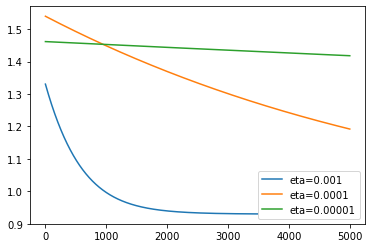

In [14]:
#Now using 20th model to compare effect of learning rate on GD

X_train = training_data_list[19][indep_attrs].to_numpy() 
Y_train = training_data_list[19][dep_attr].to_numpy()
    
X_test = testing_data_list[19][indep_attrs].to_numpy() 
Y_test = testing_data_list[19][dep_attr].to_numpy()

precision = 0.000001
eta2=0.0001
eta3=0.00001

final_theta2_gd, past_costs_train2, past_costs_test2, past_rmse_train_grad_desc2, past_rmse_test_grad_desc3 = gradient_descent(X_train, Y_train, iterations, eta2, X_test, Y_test, precision)
final_theta3_gd, past_costs_train3, past_costs_test3, past_rmse_train_grad_desc3, past_rmse_test_grad_desc3 = gradient_descent(X_train, Y_train, iterations, eta3, X_test, Y_test, precision)


plt.plot(past_rmse_train_grad_desc[19], label="eta=0.001")
plt.plot(past_rmse_train_grad_desc2, label="eta=0.0001")
plt.plot(past_rmse_train_grad_desc3, label="eta=0.00001")
plt.legend()


In [15]:
# STOCHASTIC GRADIENT DESCENT FUNCTION DEFINITION

def stoch_grad(x, y, iterations, eta, x_test, y_test, precis):
    theta = np.random.rand(x.shape[1],1)
    m = y.shape[0]
    n = y_test.shape[0]
    past_costs_train = []
    past_costs_test= []
    past_rmse_train= []
    past_rmse_test= []
    for i in range(iterations):

        for j in range(x.shape[0]):
            rand_ind = np.random.randint(0,m)
            y_j = np.matrix(y[rand_ind])
            row_j = np.matrix(x[rand_ind])
            prediction = np.matmul(row_j, theta)
            xT = row_j.transpose()
            diff = prediction - np.matrix(y_j)
            theta = theta - eta*np.matmul(xT, diff)
        
        diff_train = np.matmul(x, theta)-y
        cost_train = (1/(2*m))*(np.matmul(diff_train.T, diff_train))
        cost_train_val = np.array(cost_train)[0][0]
        past_costs_train.append(cost_train_val)
        past_rmse_train.append(np.sqrt(2*cost_train_val))
        
        diff_test = np.matmul(x_test,theta) - y_test
        mse_test = (1/(2*n))*(np.matmul(diff_test.T, diff_test))
        mse_test_val = np.array(mse_test)[0][0]
        past_costs_test.append(mse_test_val)
        past_rmse_test.append(np.sqrt(2*mse_test_val))
        if((len(past_costs_train) > 1) and abs(past_costs_train[-2]-past_costs_train[-1]) <= precis):
            break
    return theta, past_costs_train, past_costs_test, past_rmse_train, past_rmse_test   

            

In [16]:
# STOCHASTIC GRADIENT DESCENT IMPLEMENTATION ON 20 MODELS
past_rmse_train_sgd = [None]*20
past_rmse_test_sgd = [None]*20
past_costs_train_sgd = [None]*20
past_costs_test_sgd = [None]*20
final_theta_sgd = [None]*20
precision = 0.000001
eta = 0.001
iterations = 400
for i in range(20):
    
    X_train = training_data_list[i][indep_attrs].to_numpy() 
    Y_train = training_data_list[i][dep_attr].to_numpy()
    
    X_test = testing_data_list[i][indep_attrs].to_numpy() 
    Y_test = testing_data_list[i][dep_attr].to_numpy()
    
    final_theta_sgd[i], past_costs_train_sgd[i], past_costs_test_sgd[i], past_rmse_train_sgd[i], past_rmse_test_sgd[i] = stoch_grad(X_train, Y_train, iterations, eta, X_test, Y_test, precision)
    
    #printing error values for learning rate=0.01 , 20 models.
    #printing error values for learning rate=0.01 , 20 models.
    training_sgd=[]
    training_sgd.append("Training")
    testing_sgd=[]
    testing_sgd.append("Testing")
    
    print ("Error values (every 50th iteration) for model number",i+1,":-\n")
    for x in range(len(past_rmse_train_sgd[i])): 
        if x%50==0:
            training_sgd.append(past_rmse_train_sgd[i][x]) 
            testing_sgd.append(past_rmse_test_sgd[i][x])
    
    for c1, c2 in zip(training_sgd, testing_sgd):
        print ("%-40s %s" % (c1, c2))         
    print("\n")


Error values (every 50th iteration) for model number 1 :-

Training                                 Testing
1.0220202924999964                       0.9642595247321877
0.9528509545024256                       0.914913461126924
0.9500928341729393                       0.9127735609571561
0.9503347789694992                       0.9083872658473219
0.9506243745548736                       0.9131118050987298
0.9502285911226575                       0.9110397630290261
0.950423593688472                        0.914239956610359
0.9497883212434185                       0.9116897813475341


Error values (every 50th iteration) for model number 2 :-

Training                                 Testing
1.02223259317543                         1.0489403261551176
0.9319603146764392                       0.9569340731528174
0.9325264327903855                       0.9575250358004863
0.9309755966114309                       0.9545475810000845
0.9307455760306259                       0.9540947454796755
0.93

Error values (every 50th iteration) for model number 18 :-

Training                                 Testing
1.006400340345084                        1.0245154116128687
0.9507086432881837                       0.9204104744781337
0.9495564524513737                       0.9136972601868091
0.95039553841361                         0.9104700713295887
0.9495861385398114                       0.9152561177306591
0.9507485428315834                       0.9152165059663475
0.9506920483291648                       0.916702609819913


Error values (every 50th iteration) for model number 19 :-

Training                                 Testing
1.0153828191393293                       1.030054658021735
0.9356086200099236                       0.9489304661432851
0.9354275421038618                       0.948705958355987
0.9357030176547602                       0.9515695218973734
0.9363200856828399                       0.9490183847644904
0.9357843533562373                       0.9452795917920512
0.9

In [17]:
#final theta after applying SGD
bias_sgd=[]
bias_sgd.append("Bias")
age_sgd=[]
age_sgd.append("Age")
bmi_sgd=[]
bmi_sgd.append("BMI")
children_sgd=[]
children_sgd.append("Children")
print("FINAL THETA OF 20 MODELS AFTER APPLYING SGD:-")    
for x in range(20): 
            bias_sgd.append(final_theta_sgd[x][0]) 
            age_sgd.append(final_theta_sgd[x][1])
            bmi_sgd.append(final_theta_sgd[x][2]) 
            children_sgd.append(final_theta_sgd[x][3])
            
    
for c1, c2, c3, c4 in zip(bias_sgd, age_sgd, bmi_sgd, children_sgd):
        print ("%-20s %-20s %-20s %s" % (c1, c2, c3, c4))    

FINAL THETA OF 20 MODELS AFTER APPLYING SGD:-
Bias                 Age                  BMI                  Children
[[-0.01528161]]      [[0.27034115]]       [[0.17163726]]       [[0.04096946]]
[[0.01973009]]       [[0.2207659]]        [[0.17655912]]       [[0.06474939]]
[[0.00276664]]       [[0.2470179]]        [[0.13313004]]       [[0.07468571]]
[[0.0209566]]        [[0.2448827]]        [[0.21175198]]       [[0.04015545]]
[[0.04396217]]       [[0.26920466]]       [[0.13993868]]       [[-0.02800603]]
[[0.0219828]]        [[0.27060931]]       [[0.16767023]]       [[0.06713779]]
[[0.03413963]]       [[0.32948018]]       [[0.1946724]]        [[0.02428027]]
[[0.01792893]]       [[0.26247032]]       [[0.15187306]]       [[-0.01698771]]
[[0.02004236]]       [[0.27293449]]       [[0.17702469]]       [[0.05933341]]
[[0.07266179]]       [[0.26136939]]       [[0.15046632]]       [[0.06717625]]
[[0.02679713]]       [[0.2863249]]        [[0.1411436]]        [[0.05022036]]
[[0.02251639]]       [

Model number  1 :


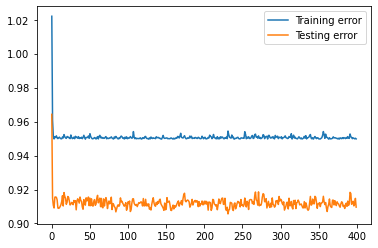

Model number  2 :


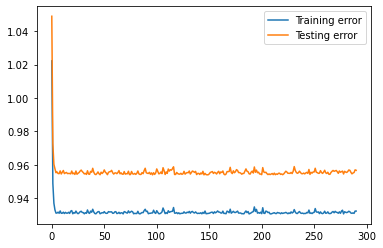

Model number  3 :


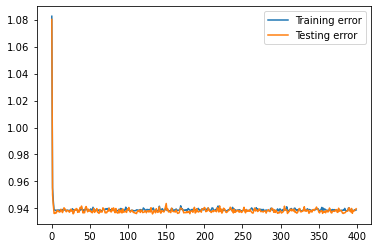

Model number  4 :


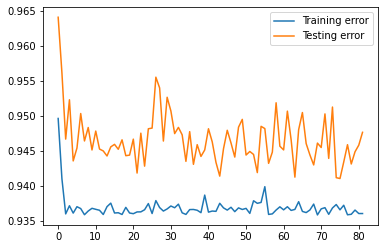

Model number  5 :


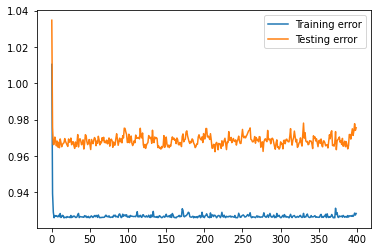

Model number  6 :


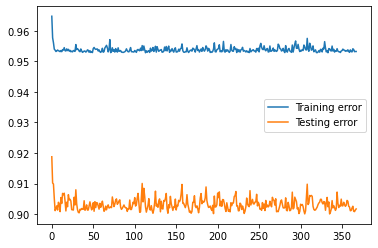

Model number  7 :


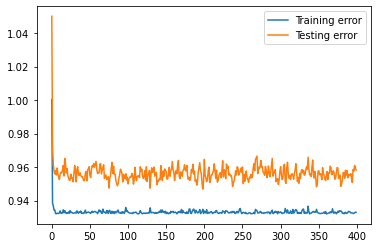

Model number  8 :


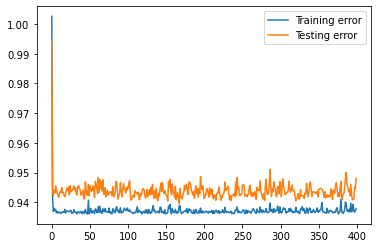

Model number  9 :


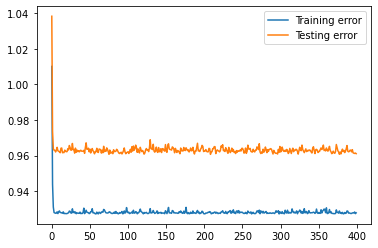

Model number  10 :


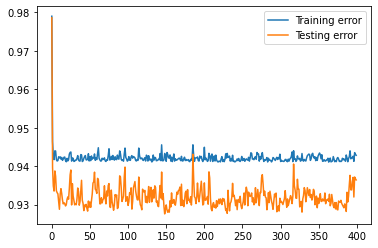

Model number  11 :


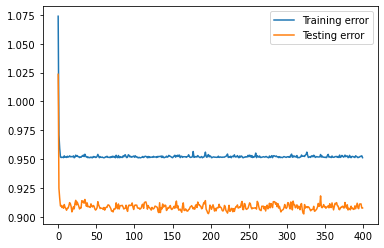

Model number  12 :


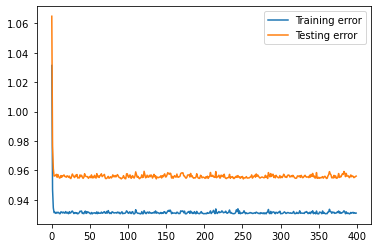

Model number  13 :


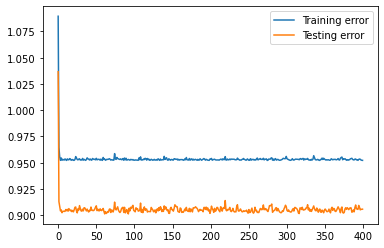

Model number  14 :


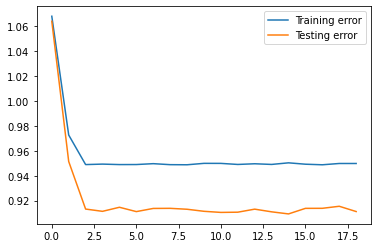

Model number  15 :


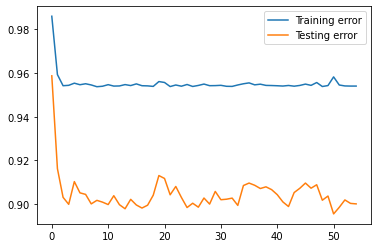

Model number  16 :


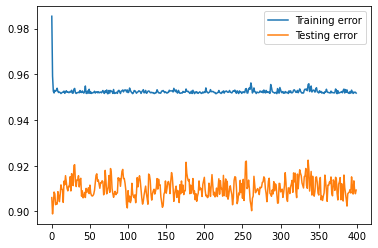

Model number  17 :


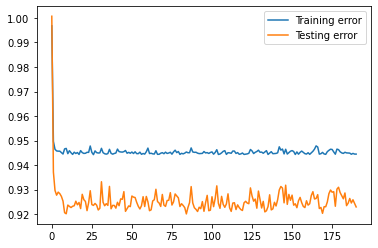

Model number  18 :


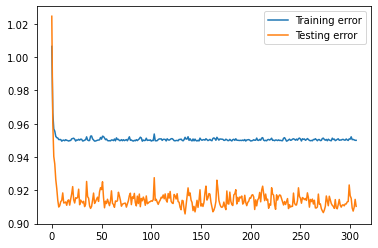

Model number  19 :


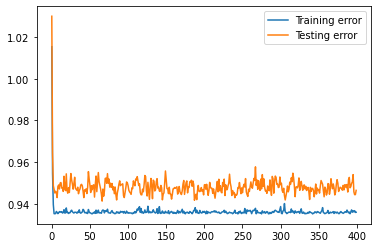

Model number  20 :


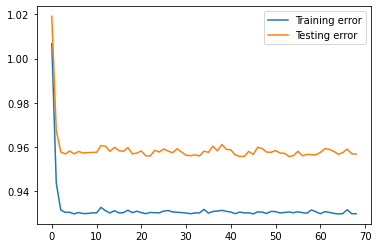

In [18]:
# Plotting training VS testing error for all 20 models for SGD
for x in range(20):
    
    plt.figure()
    print("Model number ",x+1,":")
    plt.plot(past_rmse_train_sgd[x], label="Training error")
    plt.plot(past_rmse_test_sgd[x], label="Testing error")
    plt.legend()
    plt.show()

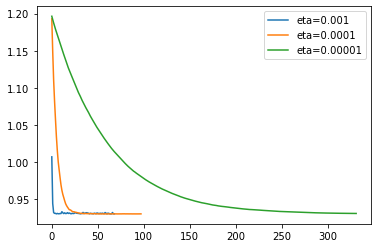

In [19]:
#Now using 20th model to compare effect of learning rate on SGD

X_train = training_data_list[19][indep_attrs].to_numpy() 
Y_train = training_data_list[19][dep_attr].to_numpy()
    
X_test = testing_data_list[19][indep_attrs].to_numpy() 
Y_test = testing_data_list[19][dep_attr].to_numpy()

precision = 0.000001
eta2=0.0001
eta3=0.00001

final_theta2, past_costs_train2, past_costs_test2, past_rmse_train_sgd2, past_rmse_test_sgd3 = stoch_grad(X_train, Y_train, iterations, eta2, X_test, Y_test, precision)
final_theta3, past_costs_train3, past_costs_test3, past_rmse_train_sgd3, past_rmse_test_sgd3 = stoch_grad(X_train, Y_train, iterations, eta3, X_test, Y_test, precision)

plt.plot(past_rmse_train_sgd[19], label="eta=0.001")
plt.plot(past_rmse_train_sgd2, label="eta=0.0001")
plt.plot(past_rmse_train_sgd3, label="eta=0.00001")
plt.legend()

In [20]:
#Creating data frame to highlight min rmse across the models
min_rmse_train_table_gd=[None]*20
min_rmse_test_table_gd=[None]*20
min_rmse_train_table_sgd=[None]*20
min_rmse_test_table_sgd=[None]*20
for x in range(20):
    min_rmse_train_table_gd[x]=past_rmse_train_grad_desc[x][len(past_rmse_train_grad_desc[x])-1]
    min_rmse_test_table_gd[x]=past_rmse_test_grad_desc[x][len(past_rmse_test_grad_desc[x])-1]
    min_rmse_train_table_sgd[x]=past_rmse_train_sgd[x][len(past_rmse_train_sgd[x])-1]
    min_rmse_test_table_sgd[x]=past_rmse_test_sgd[x][len(past_rmse_test_sgd[x])-1]

df = pd.DataFrame(list(zip(training_err_norm , min_rmse_train_table_gd, min_rmse_train_table_sgd, testing_err_norm ,  min_rmse_test_table_gd, min_rmse_test_table_sgd)), 
     index =['1', '2', '3', '4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'], columns =['NE train', 'GD train' , 'SGD train' , 'NE test', 'GD test' , 'SGD test']) 
df

,NE train,GD train,SGD train,NE test,GD test,SGD test
1,0.949599,0.950131,0.949804,0.910805,0.910565,0.909619
2,0.930527,0.931060,0.932294,0.954310,0.954914,0.956704
3,0.938039,0.938586,0.938879,0.937277,0.937291,0.939756
4,0.935739,0.936254,0.936008,0.945562,0.947789,0.947643
5,0.925960,0.926530,0.928438,0.967131,0.967428,0.975598
6,0.952771,0.953260,0.953191,0.902229,0.901527,0.901703
7,0.932016,0.932510,0.932991,0.955057,0.956391,0.958282
8,0.936021,0.936559,0.937779,0.942447,0.943903,0.948121
9,0.927262,0.927880,0.927895,0.962002,0.962457,0.961099
10,0.941044,0.941563,0.942821,0.930925,0.932358,0.936420


In [21]:
#Trying to compare the algorithms
wins_NE_train=0
wins_GD_train=0
wins_SGD_train=0
wins_NE_test=0
wins_GD_test=0
wins_SGD_test=0
for x in range(20):
    if(training_err_norm[x]<min(min_rmse_train_table_gd[x],min_rmse_train_table_sgd[x])):
        wins_NE_train+=1
    elif(min_rmse_train_table_gd[x]<min(training_err_norm[x],min_rmse_train_table_sgd[x])):
        wins_GD_train+=1
    else:
        wins_SGD_train+=1
            
    if(testing_err_norm[x]<min(min_rmse_test_table_gd[x],min_rmse_test_table_sgd[x])):
        wins_NE_test+=1
            
    elif(min_rmse_test_table_gd[x]<min(testing_err_norm[x],min_rmse_test_table_sgd[x])):
        wins_GD_test+=1
    else:
        wins_SGD_test+=1        

wins = {'Number of training minimums ':[wins_NE_train, wins_GD_train, wins_SGD_train], 'Number of testing minimums':[wins_NE_test, wins_GD_test, wins_SGD_test]}
df = pd.DataFrame(wins,index=['NE','GD','SGD'])
df

,Number of training minimums,Number of testing minimums
NE,20,10
GD,0,3
SGD,0,7


In [22]:
#Printing the training mean and variance as well as the testing mean and variance across the 3 algorithms
mean_NE_train=statistics.mean(training_err_norm)
variance_NE_train=statistics.variance(training_err_norm)
mean_GD_train=statistics.mean(min_rmse_train_table_gd)
variance_GD_train=statistics.variance(min_rmse_train_table_gd)
mean_SGD_train=statistics.mean(min_rmse_train_table_sgd)
variance_SGD_train=statistics.variance(min_rmse_train_table_sgd)

mean_NE_test=statistics.mean(testing_err_norm)
variance_NE_test=statistics.variance(testing_err_norm)
mean_GD_test=statistics.mean(min_rmse_test_table_gd)
variance_GD_test=statistics.variance(min_rmse_test_table_gd)
mean_SGD_test=statistics.mean(min_rmse_test_table_sgd)
variance_SGD_test=statistics.variance(min_rmse_test_table_sgd)

error_stats = {'Training mean error':[mean_NE_train, mean_GD_train, mean_SGD_train], 'Testing mean error':[mean_NE_test, mean_GD_test, mean_SGD_test]}
df = pd.DataFrame(error_stats,index=['NE','GD','SGD'])
display(df) 

error_stats = {'Training variance error':[variance_NE_train, variance_GD_train, variance_SGD_train], 'Testing variance error':[variance_NE_test, variance_GD_test, variance_SGD_test]}
df = pd.DataFrame(error_stats,index=['NE','GD','SGD'])
display(df) 

,Training mean error,Testing mean error
NE,0.940737,0.931967
GD,0.941271,0.932984
SGD,0.941516,0.933081


,Training variance error,Testing variance error
NE,0.000094,0.000514
GD,0.000094,0.000504
SGD,0.000088,0.000591
